In [2]:
#import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

print('core libraries are imported successfully')

core libraries are imported successfully


In [3]:
#import pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#check pytorch version
print(f"PyTorch Version:{torch.__version__}")

#Check for GPU availability
device=torch.device('cuda' if torch.cuda.is_available() else
                    'mps' if torch.backends.mps.is_available() else 'cpu')

print(f"Using Device:{device}")

#Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

if torch.cuda.is_available():
  torch.cuda.manual_seed(42)

print("\n✓ PyTorch is ready to use!")

PyTorch Version:2.9.0+cpu
Using Device:cpu

✓ PyTorch is ready to use!


In [4]:
#Quick device information
if device.type=='cuda':
  print(f"GPU:{torch.cuda.get_device_name(0)}")
  print(f"CUDA Version:{torch.version.cuda}")
elif device.type=='mps':
  print("Using Apple Metal performance shaders(MPS)")
else:
  print("Using CPU, GPU is not available")
  print("💡 CPU is fine for learning, all code will work")

Using CPU, GPU is not available
💡 CPU is fine for learning, all code will work


#Tensor Basics

In [5]:
#Different methods to create tensors

#From python list
tensor_from_list=torch.tensor([[1, 2,], [3, 4]])
print("From List:")
print(tensor_from_list)

#Zeros and Ones
Zeros=torch.zeros(2, 3)
Ones=torch.ones(2, 3)
print(f"\nZeros:\n{Zeros}")
print(f"\nOnes:\n{Ones}")

#Random Tensors
rand_tensor=torch.rand(2, 3)
randn_tensor=torch.randn(2, 3)

print(f"Random(Uniform):\n{rand_tensor}")
print(f"Random(Normal):\n{randn_tensor}")

From List:
tensor([[1, 2],
        [3, 4]])

Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Random(Uniform):
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
Random(Normal):
tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])


In [6]:
#Tensor Attributes
x=torch.randn(3, 4)

print(f"Tensor:\n{x}")
print(f"Shape:{x.shape}")
print(f"Size:{x.size()}")
print(f"Data Type:{x.dtype}")
print(f"Device:{x.device}")
print(f"Requires Grad:{x.requires_grad}")

Tensor:
tensor([[ 0.3930,  0.4327, -1.3627,  1.3564],
        [ 0.6688, -0.7077, -0.3267, -0.2788],
        [-0.4220, -1.3323, -0.3639,  0.1513]])
Shape:torch.Size([3, 4])
Size:torch.Size([3, 4])
Data Type:torch.float32
Device:cpu
Requires Grad:False


In [7]:
#Tensor Operations
a=torch.tensor([1.0, 2.0, 3.0])
b=torch.tensor([4.0, 5.0, 6.0])

print("a:", a)
print("b:", b)
print("\nOperations:")
print("a + b =", a+b)
print("a - b =", a-b)
print("a * b =", a*b)
print("a @ b=", a@b) #Dot Product
print("a.sum():", a.sum())
print("a.mean():", a.mean())
print("a.max():", a.max())

a: tensor([1., 2., 3.])
b: tensor([4., 5., 6.])

Operations:
a + b = tensor([5., 7., 9.])
a - b = tensor([-3., -3., -3.])
a * b = tensor([ 4., 10., 18.])
a @ b= tensor(32.)
a.sum(): tensor(6.)
a.mean(): tensor(2.)
a.max(): tensor(3.)


In [8]:
#Reshaping and Indexing
x = torch.arange(12)
print("Original:", x)

#Reshape to 3X4
reshape=x.view(3, 4)
print(f"Tensor Reshaped:\n{reshape}")
print(f"\nFirst Row:{reshape[0]}")
print(f"\nFirst Column:{reshape[:, 0]}")
print(f"Element [1, 2]:{reshape[1, 2]}")

Original: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Tensor Reshaped:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

First Row:tensor([0, 1, 2, 3])

First Column:tensor([0, 4, 8])
Element [1, 2]:6


#GPU Tensors

In [9]:
#Create Tensor on CPU
x_cpu=torch.randn(3, 3)
print(f"CPU Tensor device:{x_cpu.device}")

#Move to GPU (if available)
x_gpu=x_cpu.to(device)
print(f"GPU Tensor device:{x_gpu.device}")

#Or directly on device
y=torch.ones(3, 3, device=device)
print(f"Direct creation device:{y.device}")

print("\n💡 Use .to(device) to move tensors and models to GPU/CPU")

CPU Tensor device:cpu
GPU Tensor device:cpu
Direct creation device:cpu

💡 Use .to(device) to move tensors and models to GPU/CPU


In [10]:
#Numpy to PyTorch
np_array=np.array([[1, 2], [3, 4]])
torch_tensor=torch.from_numpy(np_array)
print(f"Numpy Array:\n{np_array}")
print(f"Torch Tensor:\n{torch_tensor}")

#PyTorch to numpy
tensor=torch.randn(2, 3)
numpy_array=tensor.numpy()
print("\nTensor:")
print(tensor)
print("\nNumpy:")
print(numpy_array)

print("\n⚠️ Warning: NumPy arrays and tensors share memory!")

Numpy Array:
[[1 2]
 [3 4]]
Torch Tensor:
tensor([[1, 2],
        [3, 4]])

Tensor:
tensor([[ 0.5567,  0.0744,  0.7113],
        [-0.5687,  1.2580, -1.5890]])

Numpy:
[[ 0.55673623  0.07442352  0.71131057]
 [-0.56865716  1.2580069  -1.5889642 ]]

⚠️ Warning: NumPy arrays and tensors share memory!


Auto Grad (Automatic Differentiation)

In [11]:
#Enable gradient tracking
x=torch.tensor([2.0], requires_grad=True)
print(f"x={x}")
print(f"Requires Grad:{x.requires_grad}")

#Compute y=x^2+3
y=x**2+3
print(f"\ny:{y}")

#Compute Gradient
y.backward()
print(f"\ndy/dx at x=2: {x.grad}")
print(f"Expected (2 * 2 = 4): 4")

print("\n💡 Autograd is what makes PyTorch 'auto'-matic!")

x=tensor([2.], requires_grad=True)
Requires Grad:True

y:tensor([7.], grad_fn=<AddBackward0>)

dy/dx at x=2: tensor([4.])
Expected (2 * 2 = 4): 4

💡 Autograd is what makes PyTorch 'auto'-matic!


#Data Handling

In [12]:
# Load Fashion MNIST dataset
from torchvision import datasets, transforms

# Define transformation - convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training data
train_dataset = datasets.FashionMNIST(
    root='.\data',
    train=True,
    download=True,
    transform=transform
)

# Download and load test data
test_dataset = datasets.FashionMNIST(
    root='.\data',
    train=False,
    download=True,
    transform=transform
)

print(f"Training Samples:{len(train_dataset)}")
print(f"Test Samples:{len(test_dataset)}")

print("\n✓ Fashion MNIST loaded!")

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 5.04MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 56.7MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.5MB/s]


Training Samples:60000
Test Samples:10000

✓ Fashion MNIST loaded!


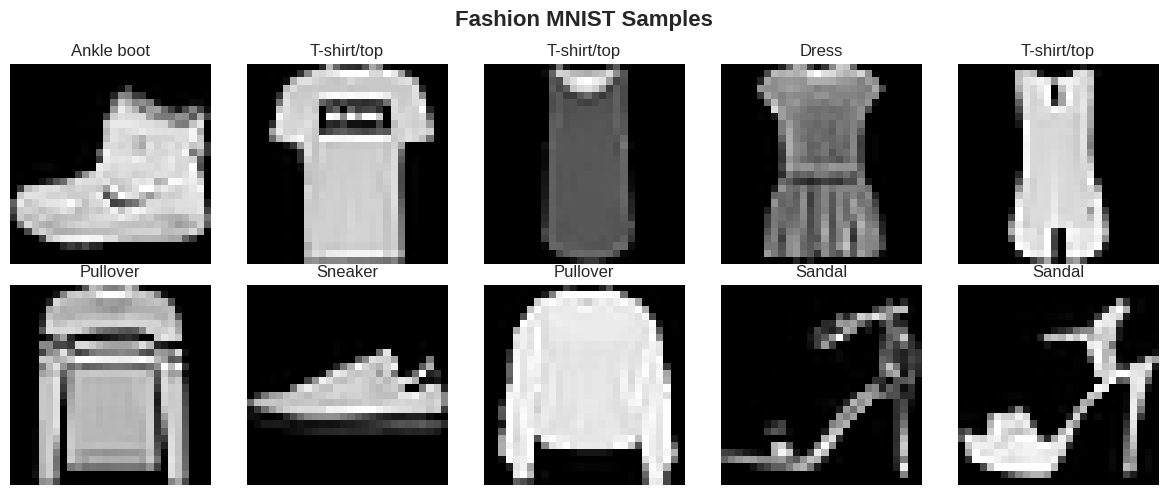

In [13]:
# Fashion MNIST class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize Samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Fashion MNIST Samples', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
  image, label = train_dataset[i]
  ax.imshow(image.squeeze(), cmap='gray')
  ax.set_title(f"{class_names[label]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

Dataloader - Batching and Shuffling

In [14]:
#!pip install DataLoader

In [15]:
#Create Dataloaders
batch_size = 64

train_loader = DataLoader (
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0
)

print(f"Number of training batches:{len(train_loader)}")
print(f"Number of test batches:{len(test_loader)}")
print(f"Batch Size:{batch_size}")

Number of training batches:938
Number of test batches:157
Batch Size:64


In [16]:
#Inspect a batch
images, labels = next(iter(train_loader))

print(f"Batch images shape:{images.shape}")
print(f"Batch labels shape:{labels.shape}")
print(f"\nImage dtype:{images.dtype}")
print(f"\nLabel dtype:{labels.dtype}")
print(f"Image Range:[{images.min():.2f}, {images.max():.2f}]")

Batch images shape:torch.Size([64, 1, 28, 28])
Batch labels shape:torch.Size([64])

Image dtype:torch.float32

Label dtype:torch.int64
Image Range:[-1.00, 1.00]


#Custom Dataset example

In [17]:
#Load Iris Dataset for binary classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris=load_iris()
X=iris.data
y=iris.target

#Binary Classification (setosa (0) vs Not setosa (1))
y_binary = (y!=0).astype(np.int64)

#Split data
X_train, X_test, y_train, y_test=train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler=StandardScaler()
#Normalize
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

print(f"Iris dataset loaded")
print(f"Training Samples:{len(X_train)}")
print(f"Test Samples:{len(X_test)}")
print(f"Features:{X_train.shape[1]}")

Iris dataset loaded
Training Samples:120
Test Samples:30
Features:4


In [18]:
#Convert to pytorch tensor and create TensorDataset
X_train_tensor=torch.FloatTensor(X_train)
y_train_tensor=torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor=torch.FloatTensor(X_test)
y_test_tensor=torch.FloatTensor(y_test).unsqueeze(1)

#Create datasets
iris_train_dataset=TensorDataset(X_train_tensor, y_train_tensor)
iris_test_dataset=TensorDataset(X_test_tensor, y_test_tensor)

#Create dataloaders
iris_train_loader=DataLoader(iris_train_dataset, batch_size=16, shuffle=True)
iris_test_loader=DataLoader(iris_test_dataset, batch_size=16, shuffle=False)

print("✓ Iris dataloader is created!")

✓ Iris dataloader is created!


# Building a model

In [19]:
# Simple binary classifier

class BinaryClassifier(nn.Module):
  def __init__(self, input_size):
    super().__init__()
    # define layers
    self.fc1=nn.Linear(input_size, 16) #First Hidden layer
    self.fc2=nn.Linear(16, 8)          #Second Hidden layer
    self.fc3=nn.Linear(8, 1)           #Output layer

  def forward(self, x):
    # define forward pass
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=torch.sigmoid(self.fc3(x))  #Sigmoid for binary classification
    return x

# create model instance
model_binary = BinaryClassifier(input_size=4)
model_binary = model_binary.to(device)

print(model_binary)
print(f"\n✓ Model created and moved to {device}")

BinaryClassifier(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

✓ Model created and moved to cpu


In [20]:
# Count Parameters
total_params = sum(p.numel() for p in model_binary.parameters())
trainable_params = sum(p.numel() for p in model_binary.parameters() if p.requires_grad)

print(f"Total Parameters:{total_params:,}")
print(f"Trainable Parameters:{trainable_params:,}")
print("Parameter Breakdown:")
for name, param in model_binary.named_parameters():
  print(f"    {name}:{param.shape} = {param.numel():,} params")

Total Parameters:225
Trainable Parameters:225
Parameter Breakdown:
    fc1.weight:torch.Size([16, 4]) = 64 params
    fc1.bias:torch.Size([16]) = 16 params
    fc2.weight:torch.Size([8, 16]) = 128 params
    fc2.bias:torch.Size([8]) = 8 params
    fc3.weight:torch.Size([1, 8]) = 8 params
    fc3.bias:torch.Size([1]) = 1 params


Test Forward Pass

In [21]:
#create dummy input
dummy_input = torch.randn(1, 4).to(device)
print(f"Input shape:{dummy_input.shape}")

#Forward Pass
output = model_binary(dummy_input)
print(f"Output Shape:{output.shape}")
print(f"Output Value:{output.item():.4f}")

print("\n✓ Farward Pass successfull!")

Input shape:torch.Size([1, 4])
Output Shape:torch.Size([1, 1])
Output Value:0.4288

✓ Farward Pass successfull!


In [22]:
#Sequential model (simpler for linear architectures)
model_sequential = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
).to(device)

print(model_sequential)
print("\n💡 nn.Sequential is simpler but less flexible than nn.Module")

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

💡 nn.Sequential is simpler but less flexible than nn.Module


#Loss Functions and Optimizers

In [23]:
#Binary classification loss
criterion_binary = nn.BCELoss()

#Multiclass Classification Loss
criterion_multiclass = nn.CrossEntropyLoss()

#Regression Loss
criterion_regression = nn.MSELoss()

print("Loss Functions Defined:")
print(f"    Binary Loss:{criterion_binary}")
print(f"    Muticlass Loss:{criterion_multiclass}")
print(f"    Regression:{criterion_regression}")

Loss Functions Defined:
    Binary Loss:BCELoss()
    Muticlass Loss:CrossEntropyLoss()
    Regression:MSELoss()


Optimizers

In [24]:
#Common Optimizers

#Adam (most popular)
optimizer_adam = optim.Adam(model_binary.parameters(), lr=0.001)

#SGD Classic
optimizer_sgd = optim.SGD(model_binary.parameters(), lr=0.01, momentum=0/9)

#RMSProp
optimizer_rmsprop = optim.RMSprop(model_binary.parameters(), lr=0.001)

print("Optimizers")
print(f"    Adam:{optimizer_adam}")
print(f"    SGD:{optimizer_sgd}")
print(f"    RMSProp:{optimizer_rmsprop}")

print("\n💡 For beginners, use Adam with lr=0.001")

Optimizers
    Adam:Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
    SGD:SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.0
    nesterov: False
    weight_decay: 0
)
    RMSProp:RMSprop (
Parameter Group 0
    alpha: 0.99
    capturable: False
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)

💡 For beginners, use Adam with lr=0.001


In [25]:
# Example: Different learning rates
lr_values = [0.0001, 0.001, 0.01, 0.1]

print("Learning rate guidelines:")
for lr in lr_values:
    if lr <= 0.001:
        comment = "Safe, might be slow"
    elif lr <= 0.01:
        comment = "Good starting point"
    else:
        comment = "Might be too high, check for instability"
    print(f"  lr={lr}: {comment}")

print("\n💡 Start with 0.001 and adjust if needed")

Learning rate guidelines:
  lr=0.0001: Safe, might be slow
  lr=0.001: Safe, might be slow
  lr=0.01: Good starting point
  lr=0.1: Might be too high, check for instability

💡 Start with 0.001 and adjust if needed


# The training loop

In [26]:
# Setup for binary classification
model_binary = BinaryClassifier(input_size=4).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_binary.parameters(), lr = 0.001)

print("✓ model loss and optimizer is ready for training!")

✓ model loss and optimizer is ready for training!


In [27]:
# Training function
def train_epoch(model, dataloader, criterion, optimizer, device):
  model.train() # Set to training mode
  running_loss = 0.0
  correct = 0
  total = 0

  for inputs, labels in dataloader:
    #move to device
    inputs, labels = inputs.to(device), labels.to(device)

    #zero gradients
    optimizer.zero_grad()

    #forward pass
    outputs = model(inputs)

    #Compute loss
    loss = criterion(outputs, labels)

    #Backward pass
    loss.backward()

    #Update weights
    optimizer.step()

    #Track statistics
    running_loss += loss.item() * inputs.size(0)
    predicted = (outputs > 0.5).float()
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  epoch_loss = running_loss/total
  epoch_acc = correct/total
  return epoch_loss, epoch_acc

print("✓ Training function defined")

✓ Training function defined


In [28]:
#Validation function
def validate(model, dataloader, criterion, device):
  model.eval() # Set to evaluation mode
  running_loss = 0
  correct = 0
  total = 0

  with torch.no_grad(): #Disable gradient computation
    for inputs, labels in dataloader:
      inputs, labels = inputs.to(device), labels.to(device)

      outputs = model(inputs)
      loss = criterion(outputs, labels)

      running_loss += loss.item() * inputs.size(0)
      predicted = (outputs > 0.5).float()
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  epoch_loss = running_loss/total
  epoch_acc = correct/total
  return epoch_loss, epoch_acc

print("✓ Validation function defined")

✓ Validation function defined


In [29]:
#Training loop
num_epochs=50
train_losses = []
val_losses = []
train_accs = []
val_accs = []

print("Training binary classifier on IRIS dataset...\n")
for epoch in range(num_epochs):
  #Train
  train_loss, train_acc = train_epoch(model_binary, iris_train_loader, criterion, optimizer, device)
  #Validate
  val_loss, val_acc = validate(model_binary, iris_test_loader, criterion, device)

  #save history
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  train_accs.append(train_acc)
  val_accs.append(val_acc)

  #Print progress every 10 epochs
  if (epoch+1)%10 == 0:
    print(f"Epoch:[{epoch+1}/{num_epochs}]")
    print(f"   Train Loss:{train_loss:.4f}, Train accuracy:{train_acc:.4f}")
    print(f"   Validation Loss:{val_loss:.4f}, Validation Accuracy:{val_acc:.4f}")

print("\n✓ Training complete!")

Training binary classifier on IRIS dataset...

Epoch:[10/50]
   Train Loss:0.3940, Train accuracy:0.6667
   Validation Loss:0.3738, Validation Accuracy:0.6667
Epoch:[20/50]
   Train Loss:0.1942, Train accuracy:1.0000
   Validation Loss:0.1815, Validation Accuracy:1.0000
Epoch:[30/50]
   Train Loss:0.0923, Train accuracy:1.0000
   Validation Loss:0.0844, Validation Accuracy:1.0000
Epoch:[40/50]
   Train Loss:0.0424, Train accuracy:1.0000
   Validation Loss:0.0381, Validation Accuracy:1.0000
Epoch:[50/50]
   Train Loss:0.0219, Train accuracy:1.0000
   Validation Loss:0.0194, Validation Accuracy:1.0000

✓ Training complete!


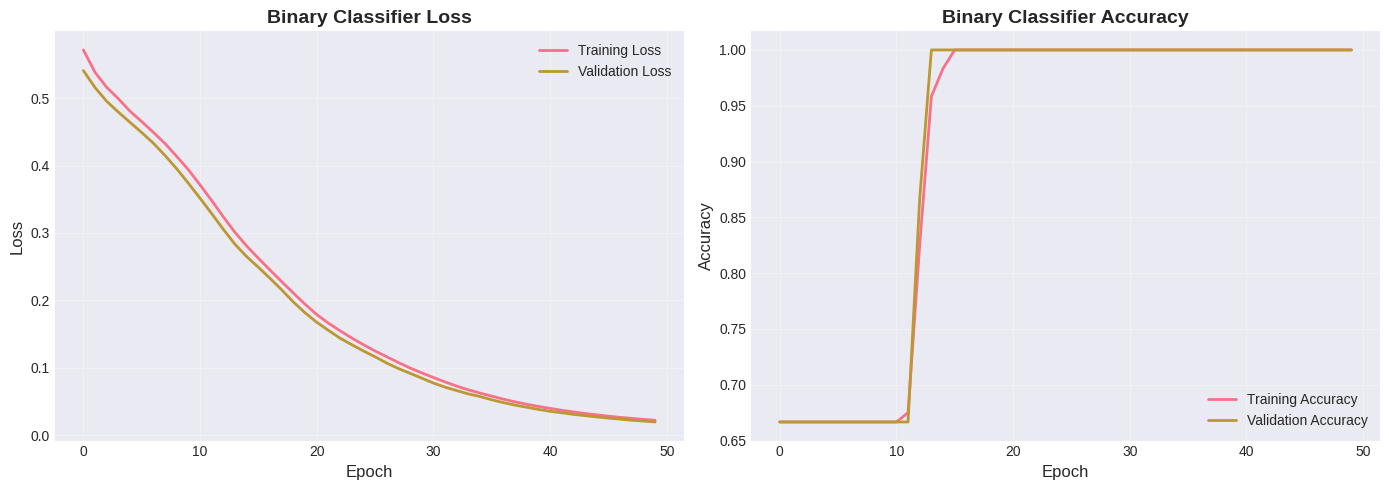

In [31]:
# Visualize training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

#Loss
ax1.plot(train_losses, label='Training Loss', linewidth=2)
ax1.plot(val_losses, label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title("Binary Classifier Loss", fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

#Accuracy
ax2.plot(train_accs, label='Training Accuracy', linewidth=2)
ax2.plot(val_accs, label='Validation Accuracy', linewidth=2)
ax2.set_xlabel("Epoch", fontsize=12)
ax2.set_ylabel("Accuracy", fontsize=12)
ax2.set_title("Binary Classifier Accuracy", fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#Model Evaluation

In [39]:
# Evaluate on test set
model_binary.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
  for inputs, labels in iris_test_loader:
    inputs=inputs.to(device)
    outputs=model_binary(inputs)
    predictions=(outputs>0.5).float().cpu()

    all_predictions.extend(predictions.numpy())
    all_labels.extend(labels.numpy())

all_predictions = np.array(all_predictions).flatten()
all_labels=np.array(all_labels).flatten()

print(f"Test Accuracy:{(all_predictions == all_labels).mean():.4f}")

Test Accuracy:1.0000


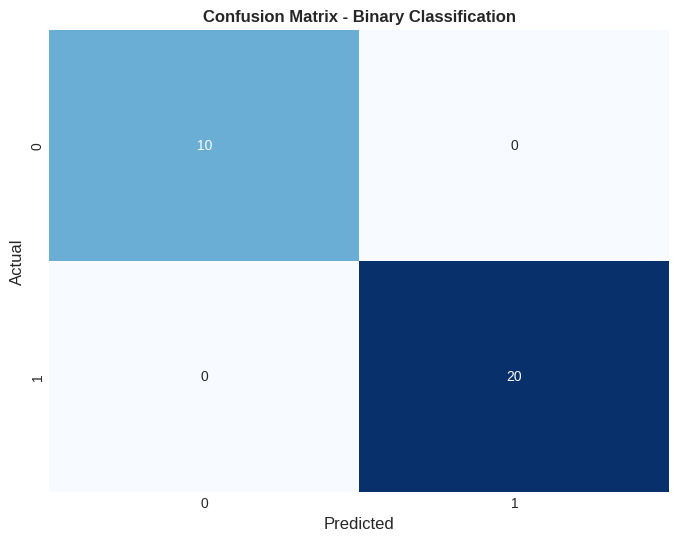

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Not Setosa       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
#Confusion_matrix and metrics
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - Binary Classification", fontsize=12, fontweight='bold')
plt.show()

print("Classification Report:")
print(classification_report(all_labels, all_predictions, target_names=['Setosa', 'Not Setosa']))

#Making predictions on new data

In [42]:
#Single sample prediction
model_binary.eval()
sample = X_test_tensor[0:1].to(device)

with torch.no_grad():
  output = model_binary(sample)
  probability = output.item()
  prediction = int(probability>0.5)

print(f"Sample Features:{sample.cpu().numpy()[0]}")
print(f"\nPredicted Probabiliy:{probability:.4f}")
print(f"Predicted Class:{prediction} ({'Not Setosa' if prediction else 'Setosa'})")
print(f"Actual Class:{int(y_test_tensor[0].item())} ({'Not Setosa' if int(y_test_tensor[0].item()) else 'Setosa'})")

Sample Features:[6.1 2.8 4.7 1.2]

Predicted Probabiliy:0.9943
Predicted Class:1 (Not Setosa)
Actual Class:1 (Not Setosa)


#Common Layers and Techniques

Activation Functions

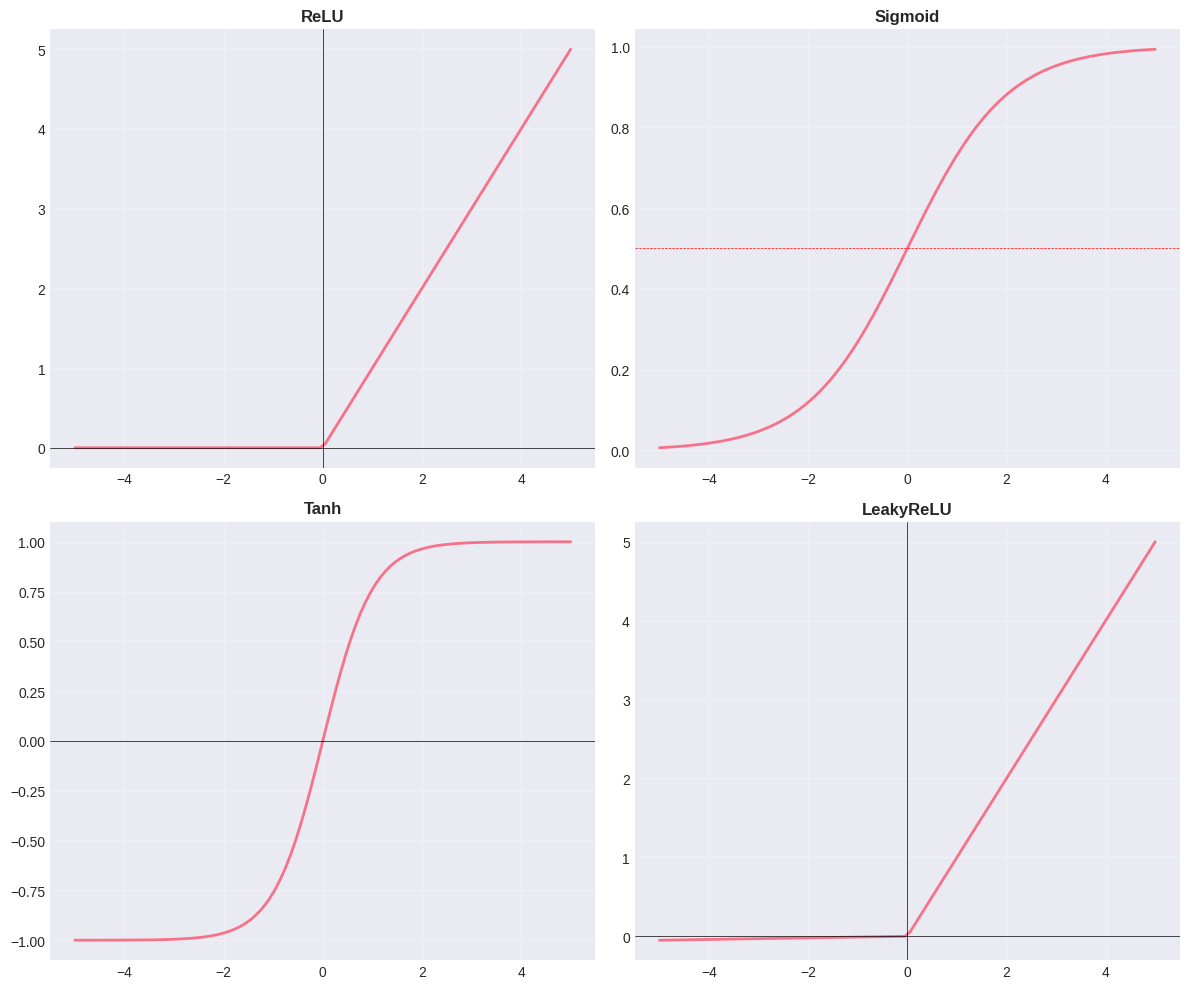

💡 Relu is the default choice for the hidden layers


In [52]:
# Visualize activation functions
x=np.linspace(-5, 5, 100)
x_tensor=torch.tensor(x, dtype=torch.float32)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ReLU
relu_output=F.relu(x_tensor).numpy()
axes[0, 0].plot(x, relu_output, linewidth=2)
axes[0, 0].set_title('ReLU', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='k', linewidth=0.5)
axes[0, 0].axvline(x=0, color='k', linewidth=0.5)

# Sigmoid
sigmoid_output=F.sigmoid(x_tensor).numpy()
axes[0, 1].plot(x, sigmoid_output, linewidth=2)
axes[0, 1].set_title('Sigmoid', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0.5, color='r', linewidth=0.5, linestyle='--')

# Tanh
tanh_output = F.tanh(x_tensor).numpy()
axes[1, 0].plot(x, tanh_output, linewidth=2)
axes[1, 0].set_title('Tanh', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='k', linewidth=0.5)

# LeakyReLU
leaky_relu_output = F.leaky_relu(x_tensor, negative_slope=0.01).numpy()
axes[1, 1].plot(x, leaky_relu_output, linewidth=2)
axes[1, 1].set_title('LeakyReLU', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("💡 Relu is the default choice for the hidden layers")

Dropout Layer

In [55]:
# Model with dropout
class ModelWithDropout(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1=nn.Linear(input_size, hidden_size)
    self.dropout1=nn.Dropout(0.3)
    self.fc2=nn.Linear(hidden_size, hidden_size//2)
    self.dropout2=nn.Dropout(0.3)
    self.fc3=nn.Linear(hidden_size//2, num_classes)

  def forward(self, x):
    x=F.relu(self.fc1(x))
    x=F.dropout1(x)
    x=F.relu(self.fc2(x))
    x=F.dropout2(x)
    x=self.fc3(x)
    return x

model_dropout=ModelWithDropout(784, 256, 10)
print(model_dropout)
print("\n💡 Dropout is automatically disabled in eval() mode")

ModelWithDropout(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

💡 Dropout is automatically disabled in eval() mode


Batch Normalization

In [56]:
# Model with batch normalization
class ModelWithBatchNorm(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1=nn.Linear(input_size, hidden_size)
    self.bn1=nn.BatchNorm1d(hidden_size)
    self.fc2=nn.Linear(hidden_size, hidden_size//2)
    self.bn2=nn.BatchNorm1d(hidden_size//2)
    self.fc3=nn.Linear(hidden_size//2, num_classes)

  def forward(self, x):
    x=self.fc1(x)
    x=self.bn1(x)
    x=F.relu(x)
    x=self.fc1(x)
    x=self.bn2(x)
    x=F.relu(x)
    x=self.fc3(x)
    return x

model_bn=ModelWithBatchNorm(784, 256, 10)
print(model_bn)
print("\n💡 BatchNorm normalizes activations, making training faster")

ModelWithBatchNorm(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

💡 BatchNorm normalizes activations, making training faster


Combining Techniques

In [57]:
#Advanced model combining multiple techniques
class AdvancedModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1=nn.Linear(input_size, hidden_size)
    self.bn1=nn.BatchNorm1d(hidden_size)
    self.dropout1=nn.Dropout(0.3)

    self.fc2=nn.Linear(hidden_size, hidden_size//2)
    self.bn2=nn.BatchNorm1d(hidden_size//2)
    self.dropout2=nn.Dropout(0.3)

    self.fc3=nn.Linear(hidden_size//2, hidden_size//4)
    self.dropout3=nn.Dropout(0.2)

    self.fc4=nn.Linear(hidden_size//4, num_classes)

  def forward(self, x):
    x=self.fc1(x)
    x=self.bn1(x)
    x=F.relu(x)
    x=self.dropout1(x)

    x=self.fc2(x)
    x=self.bn2(x)
    x=F.relu(x)
    x=self.dropout2(x)

    x=F.relu(self.fc3(x))
    x=self.dropout3(x)

    x=self.fc4(x)

    return x

advanced_model=AdvancedModel(784, 256, 10)
print(advanced_model)
print("\n✓ This model combines BatchNorm, Dropout, and ReLU")

AdvancedModel(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

✓ This model combines BatchNorm, Dropout, and ReLU
